
First 5 records:
   Invoice_ID       Date Store_Location Customer_Name Product_Name  \
0    INV1000 2024-01-15     Vijayawada         Pooja       Laptop   
1    INV1001 2024-04-12     Vijayawada          Ravi         Salt   
2    INV1002 2024-03-28      Hyderabad         Meena        Kurta   
3    INV1003 2024-05-31      Hyderabad          Ravi        Mixer   
4    INV1004 2024-01-02          Kochi          Ravi         Rice   

      Category  Quantity  Price_per_Unit  Total_Amount  
0  Electronics         7         3992.89      27950.23  
1    Groceries         8         3013.36      24106.88  
2     Clothing         3          544.88       1634.64  
3  Electronics         5         3025.52      15127.60  
4    Groceries         3          151.89        455.67  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0

Category
Clothing       297583.58
Electronics    505958.87
Groceries      523507.07
Name: Total_Amount, dtype: float64


Product_Name
Fan      146239.48
Salt     136843.87
Oil      121713.03
Mixer    119166.98
Rice     105448.66
Name: Total_Amount, dtype: float64


Store_Location
Vijayawada    31
Hyderabad     24
Kochi         24
Chennai       21
Name: count, dtype: int64

🔹 Average Bill Value: ₹13270.50
🔹 Maximum Bill Value: ₹42909.39
🔹 Minimum Bill Value: ₹127.40


/tmp/ipython-input-2-1233696389.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Category', as_index=False)['Total_Amount'].sum(),


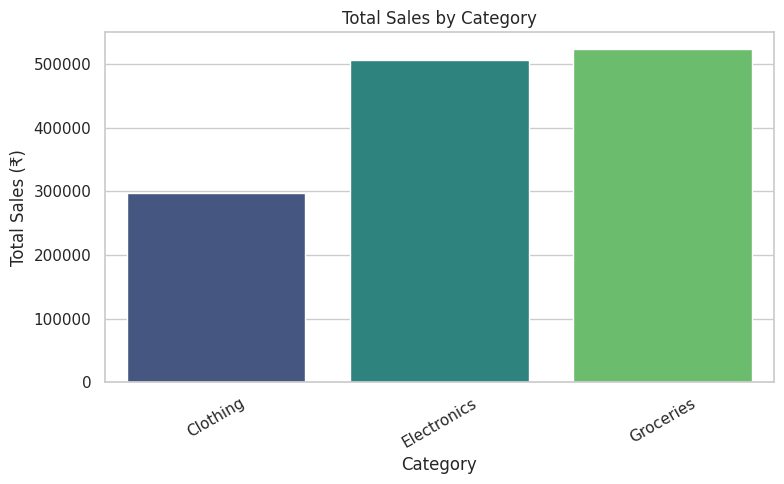

/tmp/ipython-input-2-1233696389.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Total_Amount', y='Product_Name', palette='crest')


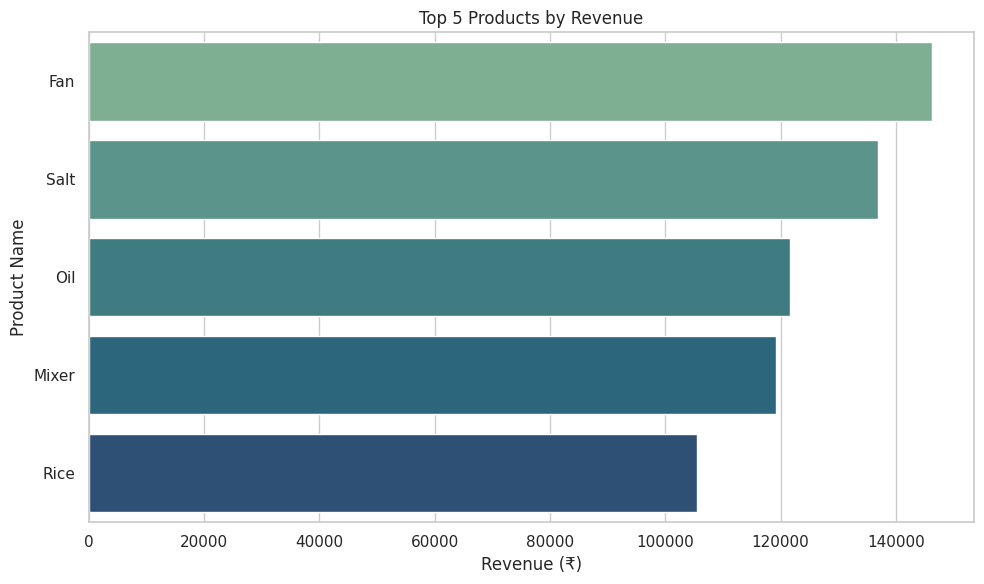

/tmp/ipython-input-2-1233696389.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Store_Location', palette='magma')


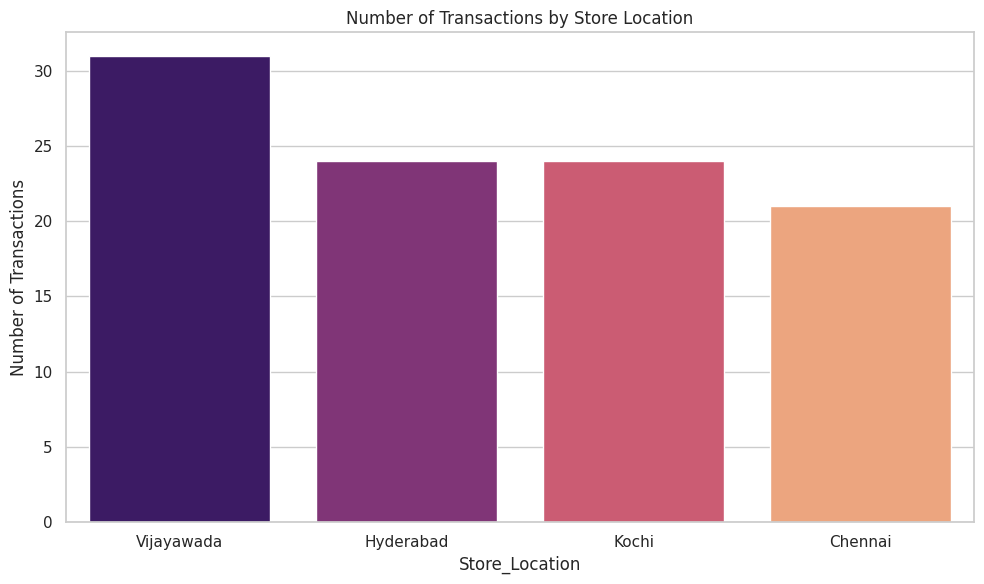

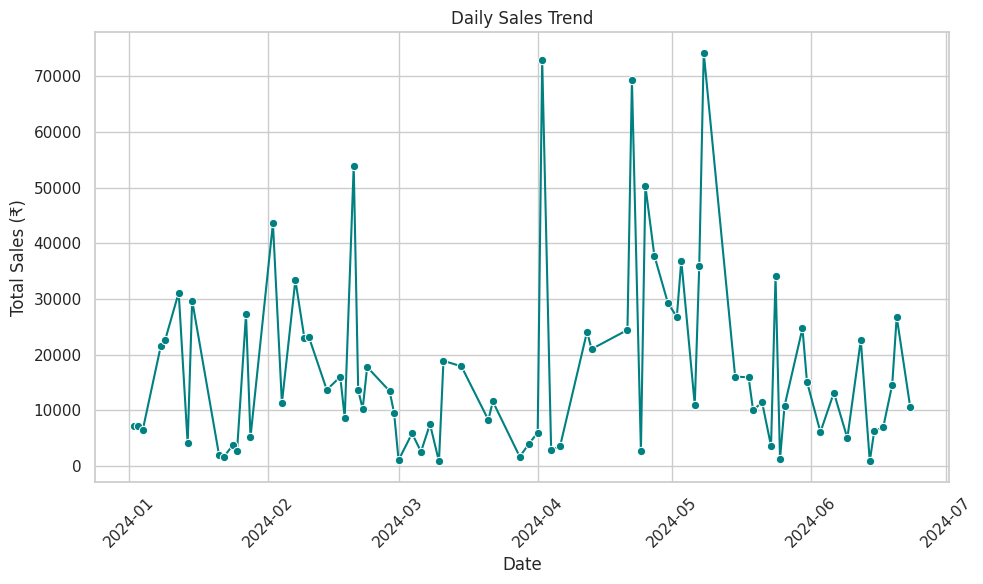

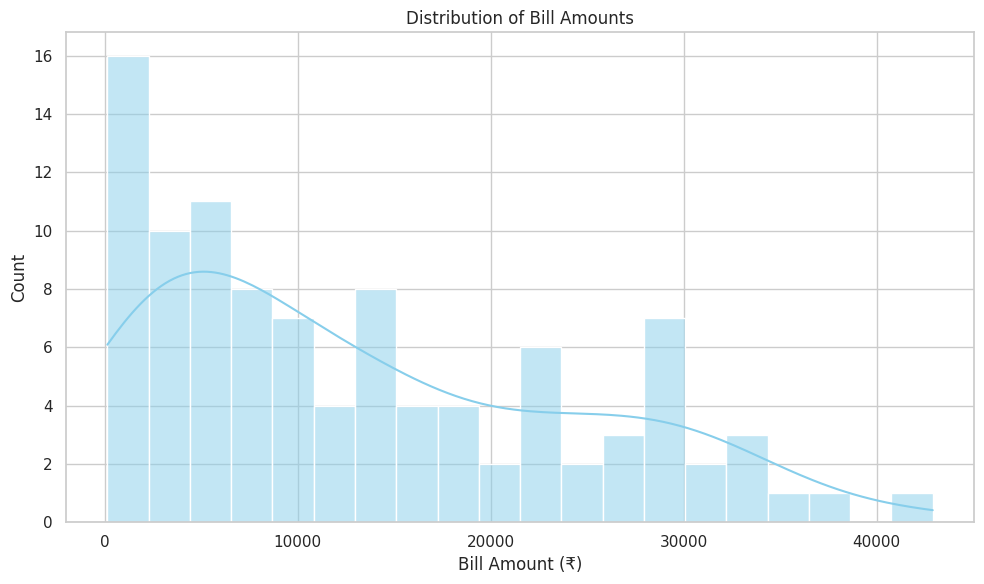

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Display settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Step 1: Creating synthetic data
np.random.seed(42)

locations = ['Hyderabad', 'Chennai', 'Kochi', 'Vijayawada']
products = {
    'Groceries': ['Rice', 'Sugar', 'Salt', 'Wheat', 'Oil'],
    'Electronics': ['TV', 'Laptop', 'Fan', 'Mobile', 'Mixer'],
    'Clothing': ['Shirt', 'Jeans', 'Saree', 'Kurta', 'T-Shirt']
}
customer_names = ['Anil', 'Ravi', 'Keerthi', 'Divya', 'Vishal', 'Meena', 'Rahul', 'Lakshmi', 'Pooja', 'Arjun']

def generate_data(n=100):
    rows = []
    for i in range(n):
        category = random.choice(list(products.keys()))
        product = random.choice(products[category])
        quantity = np.random.randint(1, 10)
        price = round(np.random.uniform(50, 5000), 2)
        amount = round(quantity * price, 2)
        rows.append([
            f"INV{1000+i}",
            pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0, 180), unit='D'),
            random.choice(locations),
            random.choice(customer_names),
            product,
            category,
            quantity,
            price,
            amount
        ])
    return rows

# Step 2: Creating DataFrame
columns = ['Invoice_ID', 'Date', 'Store_Location', 'Customer_Name', 'Product_Name', 'Category', 'Quantity', 'Price_per_Unit', 'Total_Amount']
data = generate_data(100)
df = pd.DataFrame(data, columns=columns)

# Step 3: Exploratory Data Analysis
display(HTML('<b> ● Exploratory Data Analysis :-</b>'))
print("\nFirst 5 records:\n", df.head())
print("\nDataset Info:")
print(df.info())

# Step 4: Key Metrics
display(HTML('<br><b> ● Total Sales by Category :-</b>'))
print(df.groupby('Category')['Total_Amount'].sum())

display(HTML('<br><b> ● Top 5 Products by Revenue :-</b>'))
print(df.groupby('Product_Name')['Total_Amount'].sum().sort_values(ascending=False).head())

display(HTML('<br><b> ● Most Active Store Location :-</b>'))
print(df['Store_Location'].value_counts())

# Step 5: NumPy usage for advanced metrics
average_spend = np.mean(df['Total_Amount'])
max_bill = np.max(df['Total_Amount'])
min_bill = np.min(df['Total_Amount'])

print(f"\n🔹 Average Bill Value: ₹{average_spend:.2f}")
print(f"🔹 Maximum Bill Value: ₹{max_bill:.2f}")
print(f"🔹 Minimum Bill Value: ₹{min_bill:.2f}")

# Step 6: Export to CSV
df.to_csv('smart_retail_data.csv', index=False)

# Step 7: 📊 Data Visualizations
display(HTML('<br><b> ● Visualizations :-</b>'))

# 1. Total Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(data=df.groupby('Category', as_index=False)['Total_Amount'].sum(),
            x='Category', y='Total_Amount', palette='viridis')
plt.title('Total Sales by Category')
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 2. Top 5 Revenue-Generating Products
top_products = df.groupby('Product_Name')['Total_Amount'].sum().sort_values(ascending=False).head(5).reset_index()
sns.barplot(data=top_products, x='Total_Amount', y='Product_Name', palette='crest')
plt.title('Top 5 Products by Revenue')
plt.xlabel("Revenue (₹)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# 3. Sales Distribution Across Store Locations
sns.countplot(data=df, x='Store_Location', palette='magma')
plt.title('Number of Transactions by Store Location')
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

# 4. Daily Sales Trend
daily_sales = df.groupby('Date')['Total_Amount'].sum().reset_index()
sns.lineplot(data=daily_sales, x='Date', y='Total_Amount', marker='o', color='teal')
plt.title('Daily Sales Trend')
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Distribution of Bill Amounts
sns.histplot(df['Total_Amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Bill Amounts')
plt.xlabel("Bill Amount (₹)")
plt.tight_layout()
plt.show()
